# BIOS512 Assignment #4

Sara O'Brien 

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [45]:
library(tidyverse)

In [46]:
turbines = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv',
    col_types = cols()
)

Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

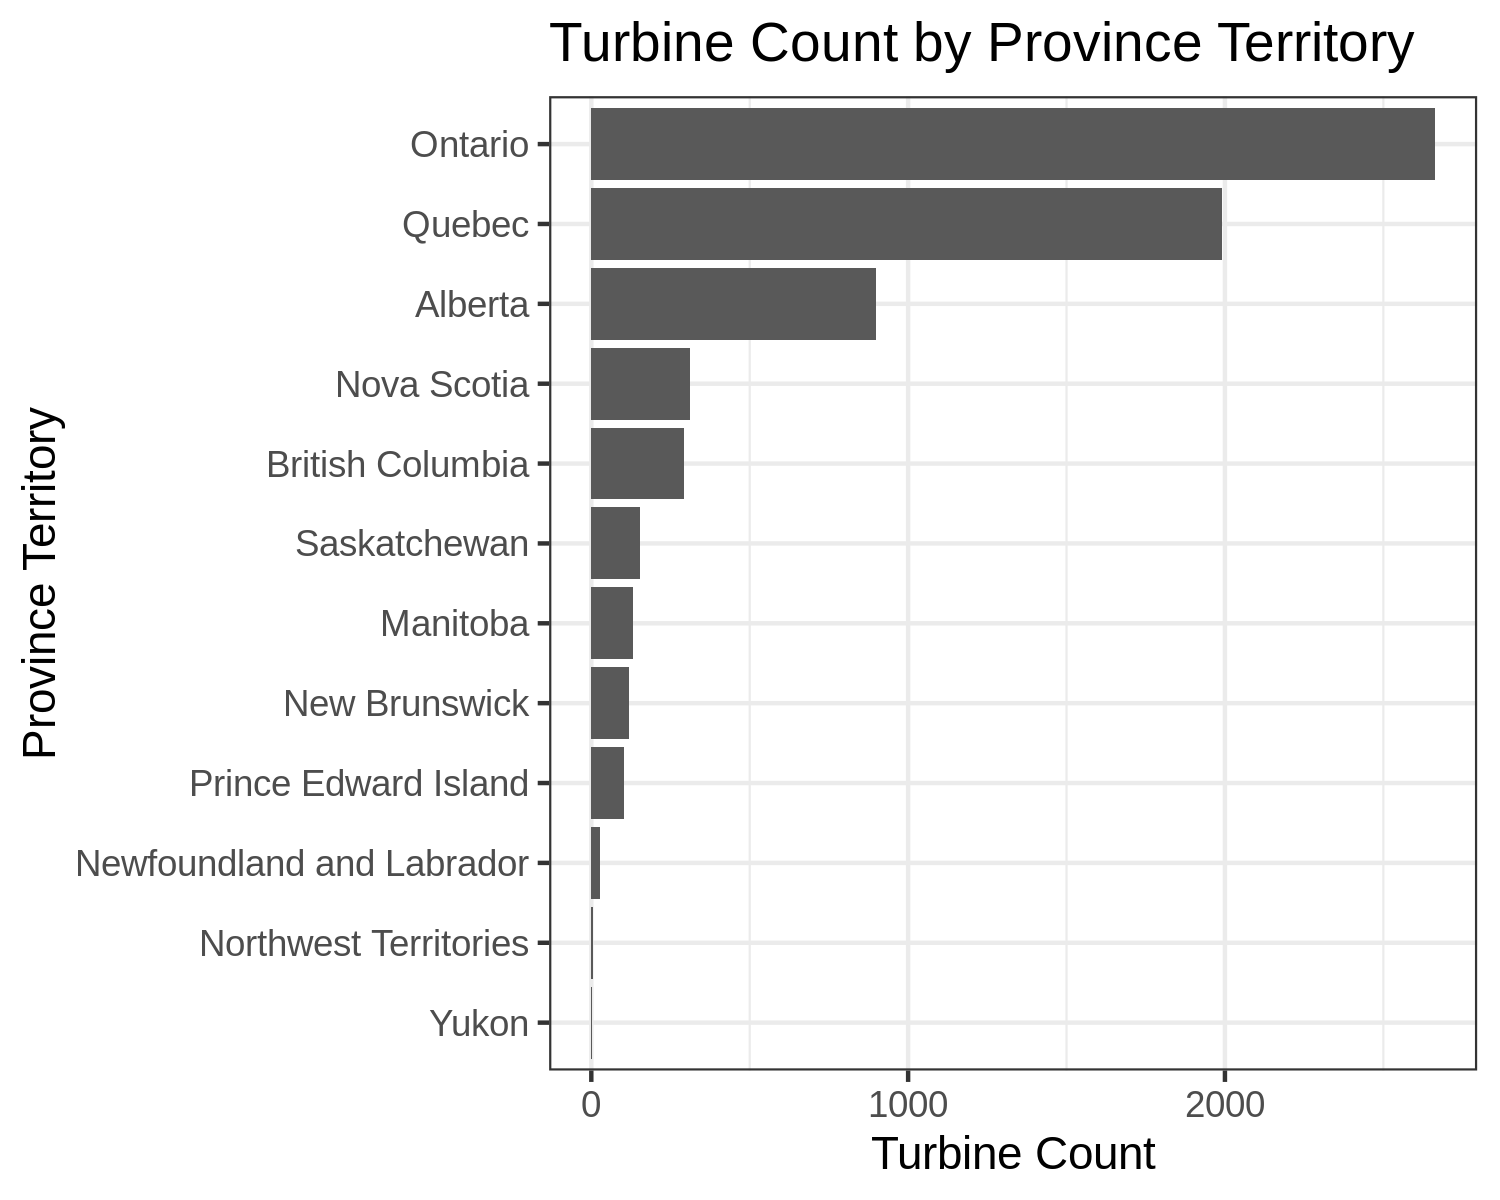

In [41]:
turbines_sort = turbines %>%
    mutate(province_territory = province_territory %>% fct_infreq() %>% fct_rev())

p = ggplot(turbines_sort, aes(y=province_territory)) 

p = p + geom_bar()

p = p + labs(title = 'Turbine Count by Province Territory', x = 'Turbine Count', y = 'Province Territory')

p = p + theme_bw()

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

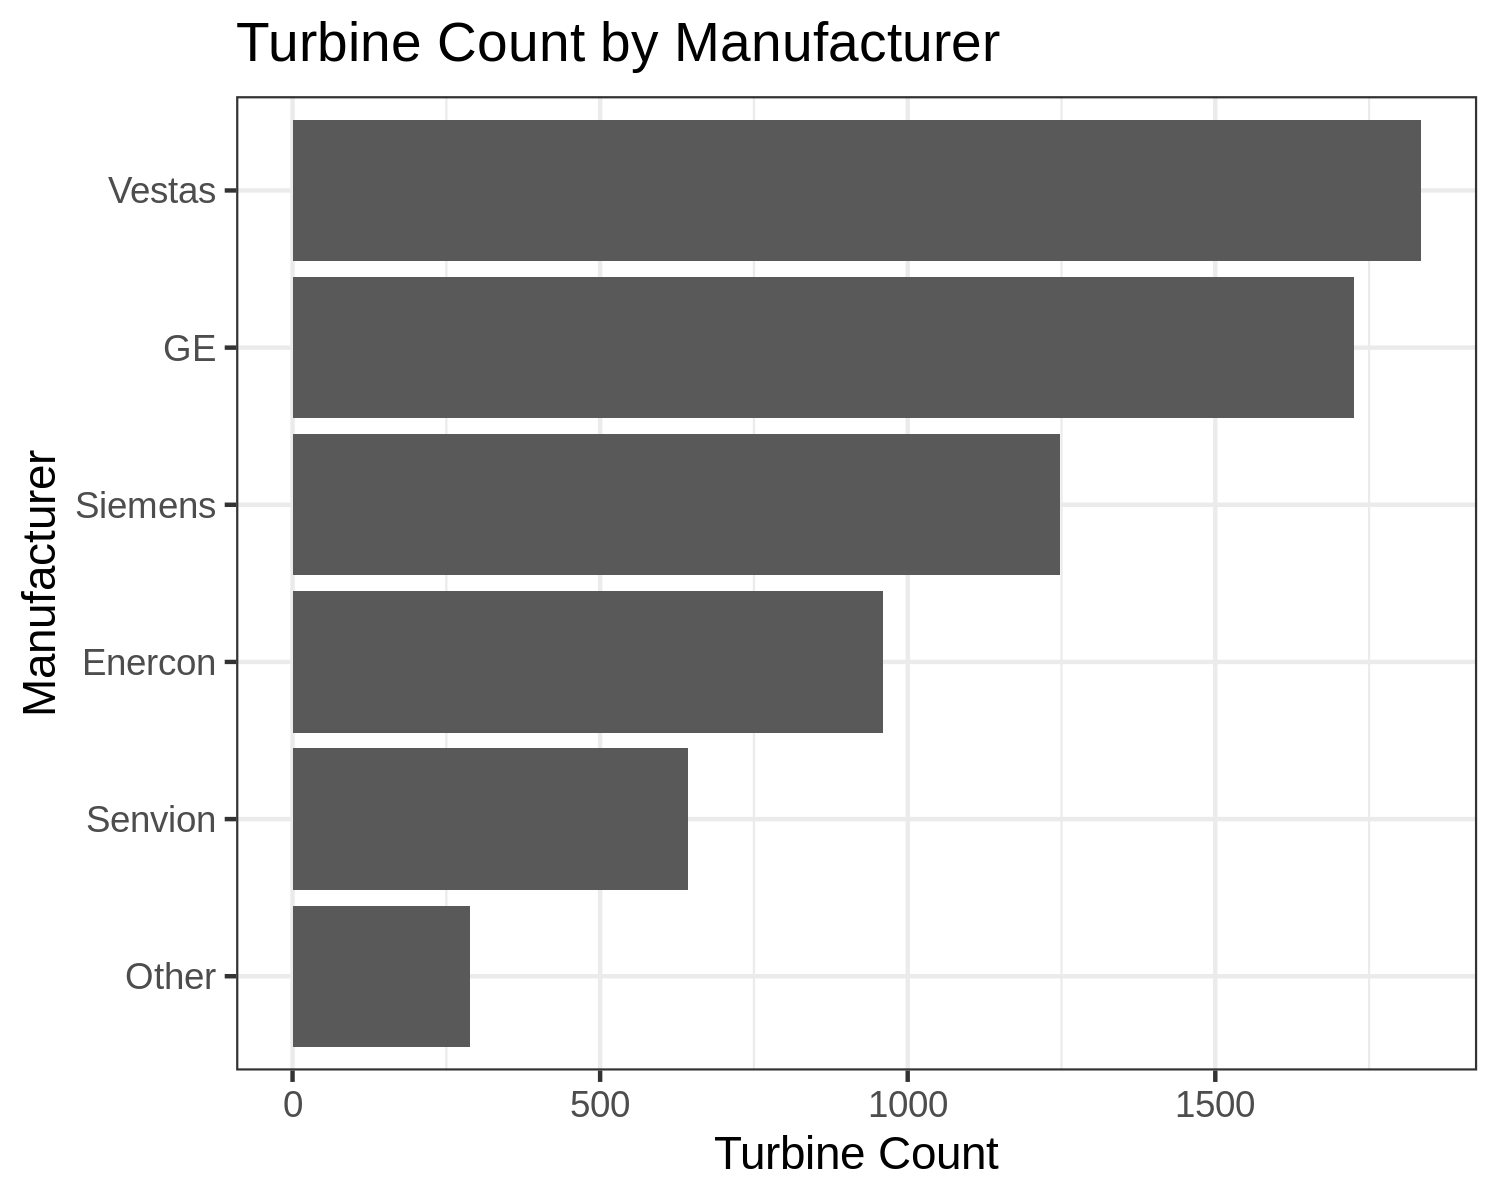

In [44]:
turbines_sort2 = turbines %>%
    mutate(manufacturer_lumped = manufacturer %>%
           fct_lump(n=5) %>%
           fct_infreq() %>% 
           fct_relevel('Other', after=Inf) %>%
           fct_rev()
          )

p2 = ggplot(turbines_sort2, aes(y=manufacturer_lumped)) 

p2 = p2 + geom_bar()

p2 = p2 + labs(title = 'Turbine Count by Manufacturer', x = 'Turbine Count', y = 'Manufacturer')

p2 = p2 + theme_bw()

p2